In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [109]:
list1 = np.array([1])
list1.shape

(1,)

In [110]:
list1 = np.array([1,2,3,4])
list1.shape

(4,)

In [111]:
list1 = np.array([[1]])
list1.shape

(1, 1)

In [112]:
list1 = np.array([[1,2,3]])
list1.shape

(1, 3)

In [113]:
list1 = np.array([[1,2,3],
                  [4,5,6]])
list1.shape

(2, 3)

In [118]:
list1 = np.array([[1,2,3,"b"],
                  [4,5,6,"a"],
                  [7,8,9,"c"]])
list1.shape

(3, 4)

In [120]:
list2 = np.array([[[1,2,3],[4,5,6]],
                  [[1,2,3],[4,5,6]]])
list2.shape

(2, 2, 3)

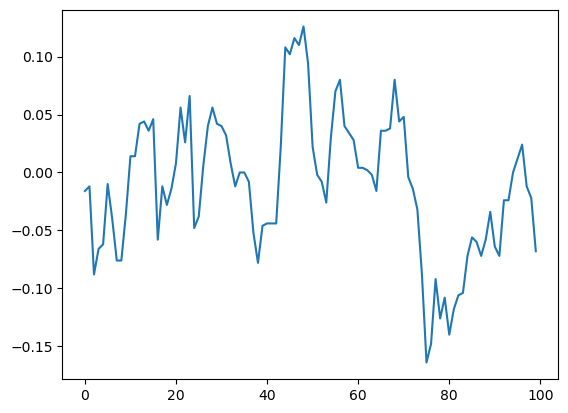

In [148]:
N_walker = 1000
steps = 100
random_walker = 2*np.random.randint(0,2,(N_walker, steps)) - 1
S_range = range(steps)
R_W = np.cumsum(random_walker, axis=1)
M_W = np.mean(R_W, axis=0)
plt.plot(S_range,M_W)



In [141]:
a = np.array([[1,2,3],
              [4,5,6],
              [4,5,6]])
print(np.cumsum(a, axis = 0))


[[ 1  2  3]
 [ 5  7  9]
 [ 9 12 15]]


In [142]:
a = np.array([[1,2,3],
              [4,5,6],
              [4,5,6]])
print(np.cumsum(a, axis = 1))


[[ 1  3  6]
 [ 4  9 15]
 [ 4  9 15]]


In [147]:
a = np.array([[1,2,3],
              [4,5,6],
              [4,5,6]])
print(np.mean(a, axis = 0))
print((1+4+4)/3)

[3. 4. 5.]
3.0


In [137]:
print(np.random.normal(0,2,(2,2)))

[[ 2.93266154  1.68743708]
 [-0.84394509 -0.47074087]]


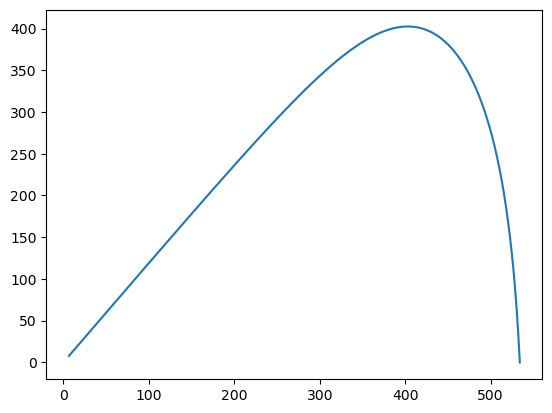

In [5]:
#define your parameters
x, y, t , m = 0, 0, 0, 1
v0, g, angle = 1000, 9.8, 50
alpha = 0.0056
vx = v0*np.cos(angle*np.pi/180)
vy = v0*np.sin(angle*np.pi/180)
dt = 0.01




def Euler(state, t, dt, derivative, params):
    return state + derivative(state,t, params)*dt


# define your derivative functions

def velocity_x(x, t, params):
    vx = params[0]
    return vx

def velocity_y(y, t, params):
    vy = params[0]
    return vy

def acc_x(vx, t, params):
    alpha, v_t, m  = params[0], params[1], params[2]
    return - ((alpha*vx*v_t)/m)

def acc_y(vy, t, params):
    g, alpha, v_t, m  = params[0], params[1], params[2], params[3]
    return  (- g - (alpha*vy*v_t)/m)


x_eu = []
y_eu = []
# define your loop for calculation
# also you can use "for step in range(n):" instead of "while y >= 0:"
while y >= 0:
    params_x = [vx]
    params_y = [vy]
    x = Euler(x, t, dt, velocity_x, params_x)
    y = Euler(y, t, dt, velocity_y, params_y)
    

    v_t = np.sqrt(vx**2 + vy**2)
    t = t + dt
    
    params_vx = [alpha, v_t, m]
    params_vy = [g, alpha, v_t, m ]
    vx = Euler(vx, t, dt, acc_x, params_vx)
    vy = Euler(vy, t, dt, acc_y, params_vy)
    
    # now append your data such as x and y to list
    x_eu.append(x)
    y_eu.append(y)

    
# plot your data
plt.plot(x_eu,y_eu)
plt.show()

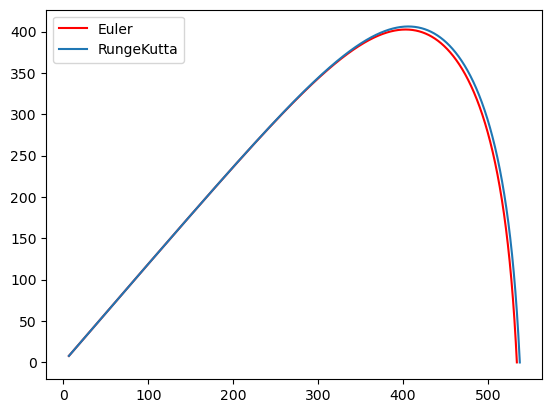

In [7]:
def RungeKuttaSecondOrder(state, t,dt,derivative,params):
    k1 = derivative(state,t, params)
    state2 = Euler(state, t, dt, derivative, params)
    k2 = derivative(state2,t+dt,params)
    return state + 0.5*dt*(k1+k2)


#define your parameters
x, y, t , m = 0, 0, 0, 1
v0, g, angle = 1000, 9.8, 50
alpha = 0.0056
vx = v0*np.cos(angle*np.pi/180)
vy = v0*np.sin(angle*np.pi/180)
dt = 0.01




def Euler(state, t, dt, derivative, params):
    return state + derivative(state,t, params)*dt


# define your derivative functions

def velocity_x(x, t, params):
    vx = params[0]
    return vx

def velocity_y(y, t, params):
    vy = params[0]
    return vy

def acc_x(vx, t, params):
    alpha, v_t, m  = params[0], params[1], params[2]
    return - ((alpha*vx*v_t)/m)

def acc_y(vy, t, params):
    g, alpha, v_t, m  = params[0], params[1], params[2], params[3]
    return  (- g - (alpha*vy*v_t)/m)


x_rk2 = []
y_rk2 = []
# define your loop for calculation
# also you can use "for step in range(n):" instead of "while y >= 0:"
while y >= 0:
    params_x = [vx]
    params_y = [vy]
    x = RungeKuttaSecondOrder(x, t, dt, velocity_x, params_x)
    y = RungeKuttaSecondOrder(y, t, dt, velocity_y, params_y)
    

    v_t = np.sqrt(vx**2 + vy**2)
    t = t + dt
    
    params_vx = [alpha, v_t, m]
    params_vy = [g, alpha, v_t, m ]
    vx = RungeKuttaSecondOrder(vx, t, dt, acc_x, params_vx)
    vy = RungeKuttaSecondOrder(vy, t, dt, acc_y, params_vy)
    
    # now append your data such as x and y to list
    x_rk2.append(x)
    y_rk2.append(y)

    
# plot your data
plt.plot(x_eu,y_eu,"r",label="Euler")
plt.plot(x_rk2,y_rk2,label="RungeKutta")
plt.legend()
plt.show()